# Vectorizing Complaint Descriptions

In this notebook, we will transform the cleaned complaint descriptions into numerical representations, a process known as vectorization. By converting text into vectors, we can use machine learning techniques to analyze and interpret patterns in the data. We will focus on two popular vectorization techniques:

1. **Bag-of-Words (BoW)**: This technique represents each complaint based on the frequency of words, capturing basic word counts across the dataset.
2. **TF-IDF (Term Frequency - Inverse Document Frequency)**: This method adjusts word frequencies by their importance, downweighting commonly used words and emphasizing words that are unique to individual complaints.

### Goals of this Notebook

- **Load Cleaned Data**: Begin by loading the preprocessed complaint data.
- **Apply Vectorization Techniques**: Generate BoW and TF-IDF matrices to represent the data in numerical form.
- **Analyze the Vectors**: Analyze the vectors by plotting them into a bar graph.
- **Save the Vectors**: Store the resulting matrices in `.npz` format to make them available for future analysis, such as topic modeling.

With these vectorized representations, we will have a structured and numerical format of the complaint data, which prepares us for identifying key themes and patterns in subsequent steps.


In [53]:
import pandas as pd
import scipy.sparse
import os
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
# Load the cleaned complaint data
complaints_df = pd.read_csv('../data/processed/cleaned_complaints.csv')

# Display the first few rows to confirm successful loading
print(complaints_df.head())

                                      Complaint Text
0                 paint base building without permit
1                       work do work building facade
2  construction rear yard addition without permit...
3                                   paint front wall
4                             installation bar patio


In [55]:
# Initialize CountVectorizer
vectorizer_bow = CountVectorizer()

# Fit and transform the complaint text to BoW vectors
bow_vectors = vectorizer_bow.fit_transform(complaints_df['Complaint Text'])

In [56]:
# Initialize TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

# Fit and transform the complaint text to TF-IDF vectors
tfidf_vectors = vectorizer_tfidf.fit_transform(complaints_df['Complaint Text'])

In [57]:
average_words_per_document_bow = np.mean(bow_vectors.toarray().sum(axis=1))
average_words_per_document_tfidf = np.mean(tfidf_vectors.toarray().sum(axis=1))

print("Average number of words per document (BoW):", average_words_per_document_bow)
print("Average number of words per document (TF-IDF):", average_words_per_document_tfidf)

Average number of words per document (BoW): 3.807302964569776
Average number of words per document (TF-IDF): 1.8047498613388036


Top N words in BoW:  ['installation' 'work' 'window' 'facade' 'replacement' 'signage' 'permit'
 'without' 'paint' 'noncompliance']
Top N words in TF-IDF:  ['installation' 'work' 'replacement' 'window' 'signage' 'facade' 'permit'
 'without' 'paint' 'noncompliance']


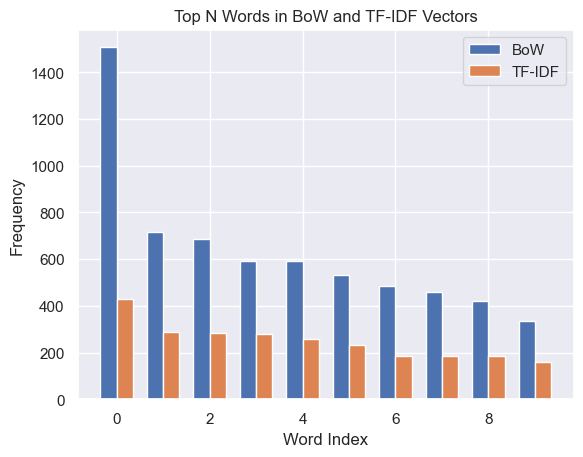

In [58]:
# Here is an in-between step to visualize the two methods and their differences
import matplotlib.pyplot as plt
import numpy as np

# Define constants
N = 10

# Get the word frequencies from the BoW and TF-IDF vectors
bow_words = bow_vectors.toarray()
tfidf_words = tfidf_vectors.toarray()

# Get the feature names (i.e. the words) from the BoW and TF-IDF vectors
bow_feature_names = vectorizer_bow.get_feature_names_out()
tfidf_feature_names = vectorizer_tfidf.get_feature_names_out()

# Get the indices of the top N words in the BoW and TF-IDF vectors
bow_top_words = np.argsort(bow_words.sum(axis=0))[-N:][::-1]
tfidf_top_words = np.argsort(tfidf_words.sum(axis=0))[-N:][::-1]

# Get the word frequencies for the top N words in the BoW and TF-IDF vectors
bow_word_frequencies = bow_words.sum(axis=0)[bow_top_words]
tfidf_word_frequencies = tfidf_words.sum(axis=0)[tfidf_top_words]

# Get the word names for the top N words in the BoW and TF-IDF vectors
bow_top_word_names = bow_feature_names[bow_top_words]
tfidf_top_word_names = tfidf_feature_names[tfidf_top_words]

# Print top N words in BoW and TF-IDF vectors
print("Top N words in BoW: ", bow_top_word_names)
print("Top N words in TF-IDF: ", tfidf_top_word_names)

# Create grouped bar chart to compare top N word frequencies
plt.bar(np.arange(N) - 0.35/2, bow_word_frequencies, 0.35, label='BoW')
plt.bar(np.arange(N) + 0.35/2, tfidf_word_frequencies, 0.35, label='TF-IDF')
plt.xlabel('Word Index')
plt.ylabel('Frequency')
plt.title('Top N Words in BoW and TF-IDF Vectors')
plt.legend()
plt.show()

### Analysis of Top N Words in BoW and TF-IDF Vectors

This chart shows the frequency of the top N words in Bag-of-Words (BoW) and TF-IDF models.

1. **Higher Frequencies in BoW**:
   - BoW has significantly higher frequencies because it simply counts each word's occurrences. This leads to larger raw counts, especially for commonly used words.

2. **Weighting in TF-IDF**:
   - TF-IDF frequencies are lower since it reduces the importance of words that appear frequently across documents. Instead, TF-IDF highlights words that are more unique or informative in individual documents.

3. **Different Word Importance**:
   - BoW assigns high importance to frequently used words, while TF-IDF emphasizes less common but more informative words. This difference impacts the interpretation of topics, as BoW is frequency-focused, and TF-IDF prioritizes unique terms.

This comparison shows how BoW and TF-IDF differ in word importance, which affects the results and interpretation in topic modeling.

In [59]:
# Save BoW vectors
scipy.sparse.save_npz('../data/processed/bow_vectors.npz', bow_vectors)
# Saving the vectorized object for further use
with open('../data/processed/vectorizer_bow.pkl', 'wb') as f:
    pickle.dump(vectorizer_bow, f)
# Save TF-IDF vectors
scipy.sparse.save_npz('../data/processed/tfidf_vectors.npz', tfidf_vectors)
with open('../data/processed/vectorizer_tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer_tfidf, f)

### Saving Vectorized Data

We save the Bag-of-Words and TF-IDF matrices in compressed `.npz` format. This format is efficient for storing large sparse matrices, allowing us to easily reload these vectors in future notebooks without repeating the vectorization process.
